# Imports and Function Definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import product
from random import choices

In [10]:
def mich_menten(S, k_m, v_max):
    return v_max * S / (k_m + S)

def run(params, data):
    for s, km, vmax in params:
        if (km, vmax) not in data:
            data[(km,vmax)] = list()
    
        data[(km, vmax)].append(mich_menten(s,km, vmax))
    
    return data

def dominant(dataset1, dataset2):
    result = 'Indeterminant'
    
    if max(dataset1) > max(dataset2):
        result = 'Enzyme 1'
    
    if max(dataset1) < max(dataset2):
        result = 'Enzyme 2'
    
    return result

# Data Simulation

In [11]:
S = np.linspace(0, 5, 100)
Km = np.linspace(0.1, 1, 10)
Vmax = np.linspace(0.9, 1.1, 2)

params = product(S, Km, Vmax)

data = run(params, dict())

# Plot

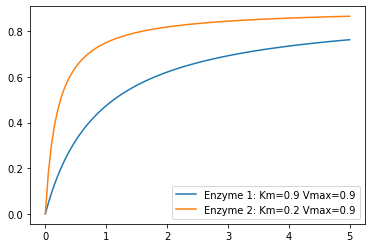

In [15]:
combos = [(km, vmax) for (km, vmax) in data]
enzyme1, enzyme2 = choices(combos, k=2)

plt.plot(S, data[enzyme1], label=f'Enzyme 1: Km={enzyme1[0]} Vmax={enzyme1[1]}')
plt.plot(S, data[enzyme2], label=f'Enzyme 2: Km={enzyme2[0]} Vmax={enzyme2[1]}')
plt.legend()
plt.show()